# Data Insights
### Targeting high value customers based on customer demographics and attributes.

In [1]:
#To access python data science libraries and visualise data and render plots in the Jupyter Notebook
import os
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
import operator as op
%matplotlib inline

## Merge previous customer tables

In [2]:
# csv files after data cleaning
cdc = pd.read_csv('customer_demographic_cleaned.csv')
cac = pd.read_csv('customer_address_cleaned.csv')
tc = pd.read_csv('transaction_cleaned.csv')
new_customer = pd.read_csv('new_customer_list_cleaned.csv')

In [3]:
# Merge all previous customer tables based on matching 'customer id' column
csv1_2 = pd.merge(cdc, cac, on=['customer_id'])
pre_customer = pd.merge(csv1_2, tc, on=['customer_id'])

In [4]:
# Export merged csv
pre_customer.to_csv( "pre_customer_merged.csv", index=False, encoding='utf-8-sig')

In [2]:
# customer datasets
new_customer = pd.read_csv('new_customer_list_cleaned.csv')
pre_customer = pd.read_csv('pre_customer_merged.csv')

## Previous customers and new customers data preperation
### Previous customers

In [3]:
# previous customers
pre_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19968 entries, 0 to 19967
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          19968 non-null  int64  
 1   first_name                           19968 non-null  object 
 2   last_name                            19326 non-null  object 
 3   gender                               19968 non-null  object 
 4   past_3_years_bike_related_purchases  19968 non-null  int64  
 5   DOB                                  19522 non-null  object 
 6   job_title                            17589 non-null  object 
 7   job_industry_category                16746 non-null  object 
 8   wealth_segment                       19968 non-null  object 
 9   deceased_indicator                   19968 non-null  object 
 10  owns_car                             19968 non-null  object 
 11  tenure                      

In [17]:
# convert DOB to datetime type
pre_customer['DOB'] = pre_customer['DOB'].apply(pd.to_datetime)
pre_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19513 entries, 0 to 19967
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19513 non-null  int64         
 1   first_name                           19513 non-null  object        
 2   last_name                            18887 non-null  object        
 3   gender                               19513 non-null  object        
 4   past_3_years_bike_related_purchases  19513 non-null  int64         
 5   DOB                                  19513 non-null  datetime64[ns]
 6   job_title                            17173 non-null  object        
 7   job_industry_category                16291 non-null  object        
 8   wealth_segment                       19513 non-null  object        
 9   deceased_indicator                   19513 non-null  object        
 10  owns_car  

In [4]:
# check null values
pre_customer.isnull().sum()

customer_id                               0
first_name                                0
last_name                               642
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     446
job_title                              2379
job_industry_category                  3222
wealth_segment                            0
deceased_indicator                        0
owns_car                                  0
tenure                                  446
address                                   0
postcode                                  0
state                                     0
country                                   0
property_valuation                        0
transaction_id                            0
product_id                                0
transaction_date                          0
online_order                            359
order_status                              0
brand                           

In [5]:
# drop records with missing DOB
pre_customer=pre_customer.dropna(subset=['DOB'])
pre_customer.isnull().sum()

customer_id                               0
first_name                                0
last_name                               626
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                       0
job_title                              2340
job_industry_category                  3222
wealth_segment                            0
deceased_indicator                        0
owns_car                                  0
tenure                                    0
address                                   0
postcode                                  0
state                                     0
country                                   0
property_valuation                        0
transaction_id                            0
product_id                                0
transaction_date                          0
online_order                            351
order_status                              0
brand                           

In [6]:
# Transform DOB to age
ref_date = dt.datetime.now()
pre_customer['Age'] = pre_customer['DOB'].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq = 'Y')))
pre_customer = pre_customer[pre_customer.Age < 100]

# use of lambda
# x = lambda a, b : a * b
# print(x(5, 6))

In [32]:
min(pre_customer['Age'])

20

In [31]:
max(pre_customer['Age'])

91

In [7]:
# Transform age to generation
# >=75(Interwar), 55-74(Boomers), 40-54(Gen X), 25-39(Millennials), 10-24(Gen Z)
age_col = list(pre_customer.Age)
gen = []
for i in range(len(pre_customer)):
    n = age_col[i]
    if n >=75:
        gen.append(5)
    elif n >=55:
        gen.append(4)
    elif n >=40:
        gen.append(3)
    elif n >=25:
        gen.append(2)
    else: 
        gen.append(1)
        
pre_customer['Generation'] = gen       

In [11]:
pre_customer.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age,Generation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,1970-01-01 10:41:22,69,4
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Solex,Standard,medium,medium,1577.53,826.51,1970-01-01 10:58:46,69,4
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,1970-01-01 10:30:23,69,4
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,1970-01-01 10:31:13,69,4
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 10:42:53,69,4


In [8]:
# Export final csv
pre_customer.to_csv( "pre_customer_final.csv", index=False, encoding='utf-8-sig')

### New customers

In [9]:
# new customers
new_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [10]:
# converst DOB to datetime type
new_customer['DOB'] = new_customer['DOB'].apply(pd.to_datetime)
new_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [13]:
new_customer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [11]:
# check null values
new_customer.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [12]:
# drop records with missing DOB
new_customer=new_customer.dropna(subset=['DOB'])
new_customer.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              105
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [13]:
# Transform DOB to age
ref_date = dt.datetime.now()
new_customer['Age'] = new_customer['DOB'].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq = 'Y')))
new_customer = new_customer[new_customer.Age < 100]

In [58]:
min(new_customer['Age'])

20

In [59]:
max(new_customer['Age'])

84

In [14]:
# Transform age to generation
# >=75(Interwar), 55-74(Boomers), 40-54(Gen X), 25-39(Millennials), 10-24(Gen Z)
age_col = list(new_customer.Age)
gen = []
for i in range(len(new_customer)):
    n = age_col[i]
    if n >=75:
        gen.append(5)
    elif n >=55:
        gen.append(4)
    elif n >=40:
        gen.append(3)
    elif n >=25:
        gen.append(2)
    else: 
        gen.append(1)
        
new_customer['Generation'] = gen

In [174]:
new_customer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Generation
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,65,4
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,52,3
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,48,3
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,43,3
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,57,4


In [15]:
new_customer['Generation'].value_counts()

4    330
3    304
2    194
5     99
1     56
Name: Generation, dtype: int64

In [16]:
# Export final csv
new_customer.to_csv( "new_customer_final.csv", index=False, encoding='utf-8-sig')

## Data visualization

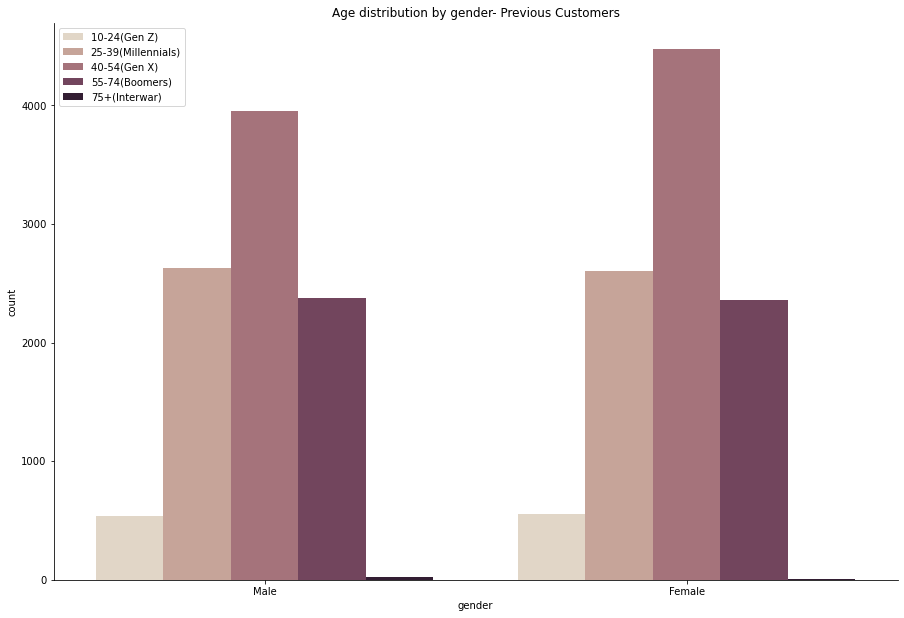

In [33]:
# Age x gender: pre_customer 
age_plot_p = sns.catplot(x="gender", kind="count", hue="Generation",palette="ch:.25", data=pre_customer, order=['Male','Female'],height=8.27, aspect=12.5/8.27)
age_plot_p._legend.remove()
plt.legend(labels=['10-24(Gen Z)', '25-39(Millennials)', '40-54(Gen X)','55-74(Boomers)','75+(Interwar)'],loc='upper left')
age_plot_p.set(title="Age distribution by gender- Previous Customers")
plt.savefig('age_plot_p.png')

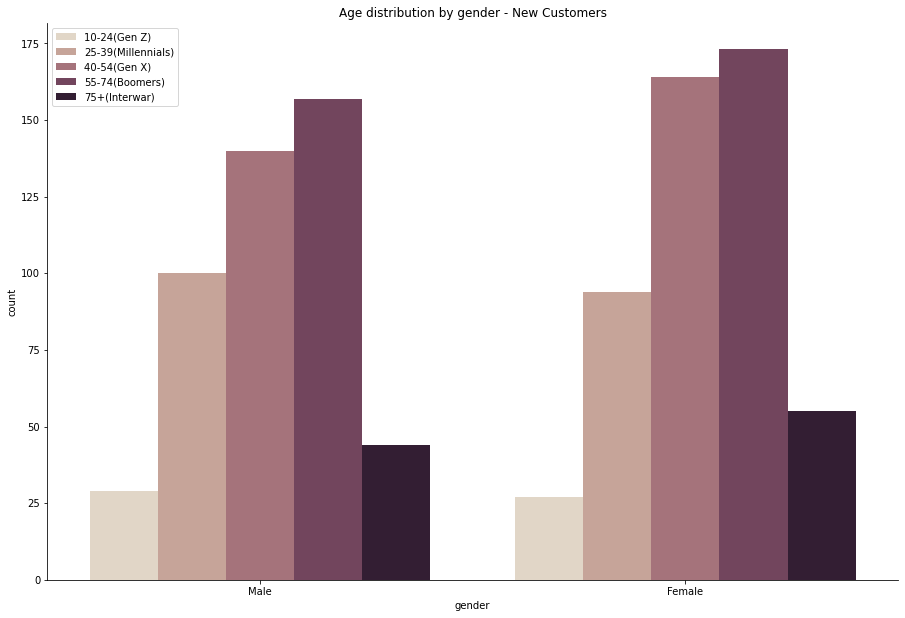

In [34]:
# Age x gender: new_customer 
age_plot_n = sns.catplot(x="gender", kind="count", hue="Generation",palette="ch:.25", data=new_customer,height=8.27, aspect=12.5/8.27)
age_plot_n._legend.remove()
plt.legend(labels=['10-24(Gen Z)', '25-39(Millennials)', '40-54(Gen X)','55-74(Boomers)','75+(Interwar)'],loc='upper left')
age_plot_n.set(title="Age distribution by gender - New Customers")
plt.savefig('age_plot_n.png')

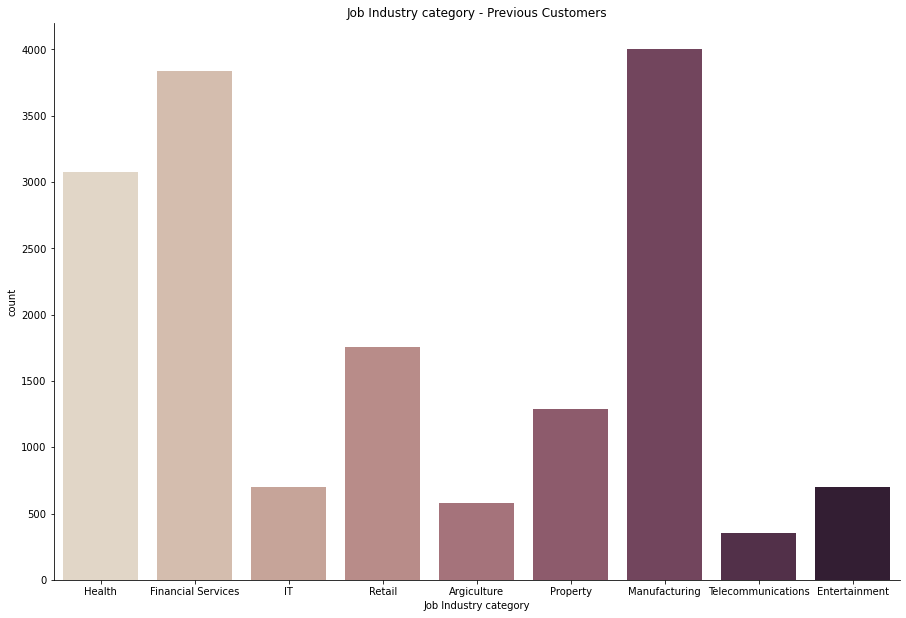

In [35]:
# Job industry: pre_customer 
industry_plot_p = sns.catplot(x="job_industry_category", kind="count", palette="ch:.25", data=pre_customer,height=8.27, aspect=12.5/8.27)
industry_plot_p.set(title="Job Industry category - Previous Customers")
plt.xlabel('Job Industry category')
plt.savefig('industry_plot_p.png')

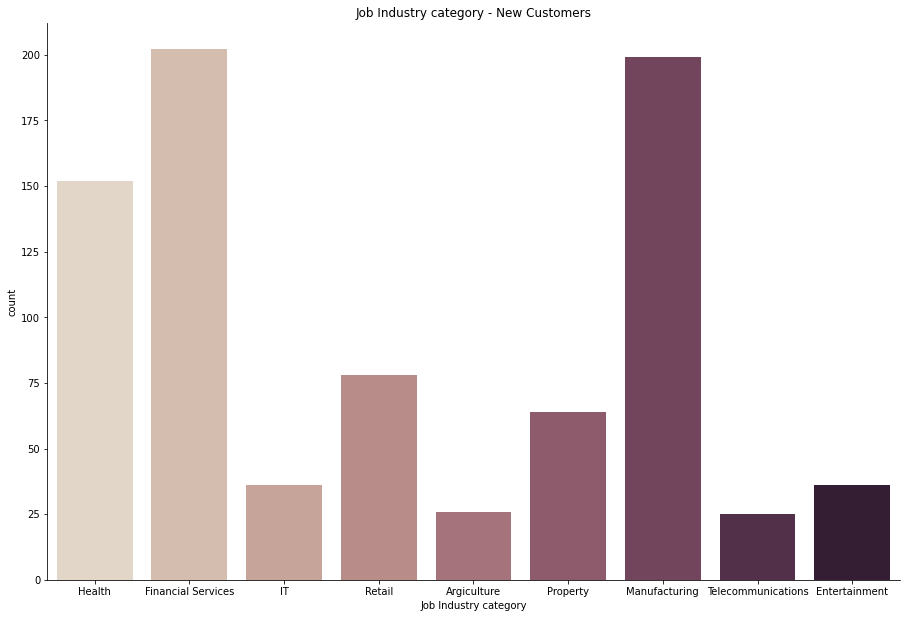

In [36]:
# Job industry: new_customer 
industry_plot_n = sns.catplot(x="job_industry_category", kind="count", palette="ch:.25", data=new_customer,
                              order=['Health','Financial Services','IT','Retail','Argiculture','Property','Manufacturing','Telecommunications','Entertainment'],
                              height=8.27, aspect=12.5/8.27)
industry_plot_n.set(title="Job Industry category - New Customers")
plt.xlabel('Job Industry category')
plt.savefig('industry_plot_n.png')

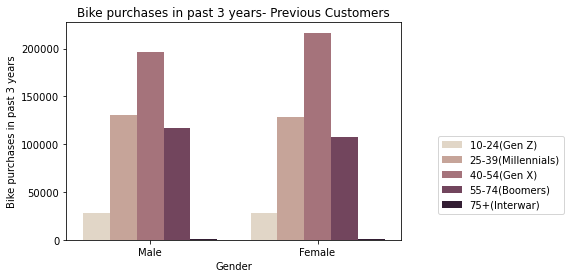

In [37]:
# Bike purchases: pre_customer 
bike_plot_p= sns.barplot(
    y="past_3_years_bike_related_purchases", 
    x="gender", 
    data=pre_customer, 
    estimator=sum, 
    hue="Generation",
    ci=None, 
    order=['Male','Female'],
    palette="ch:.25")
plt.xlabel('Gender')
plt.ylabel('Bike purchases in past 3 years')
bike_plot_p.set(title="Bike purchases in past 3 years- Previous Customers")
bike_plot_p.get_legend().remove()
plt.legend(labels=['10-24(Gen Z)', '25-39(Millennials)', '40-54(Gen X)','55-74(Boomers)','75+(Interwar)'],bbox_to_anchor=(1.5,0.5),loc='upper right')
plt.savefig('bike_plot_p.png')

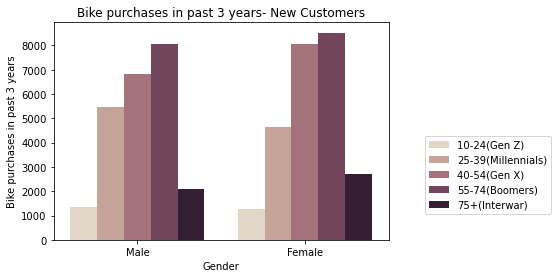

In [38]:
# Bike purchases: new_customer 
bike_plot_n= sns.barplot(
    y="past_3_years_bike_related_purchases", 
    x="gender", 
    data=new_customer, 
    estimator=sum, 
    hue="Generation",
    ci=None, 
    palette="ch:.25")
plt.xlabel('Gender')
plt.ylabel('Bike purchases in past 3 years')
bike_plot_n.set(title="Bike purchases in past 3 years- New Customers")
bike_plot_n.get_legend().remove()
plt.legend(labels=['10-24(Gen Z)', '25-39(Millennials)', '40-54(Gen X)','55-74(Boomers)','75+(Interwar)'],bbox_to_anchor=(1.5,0.5),loc='upper right')
plt.savefig('bike_plot_n.png')

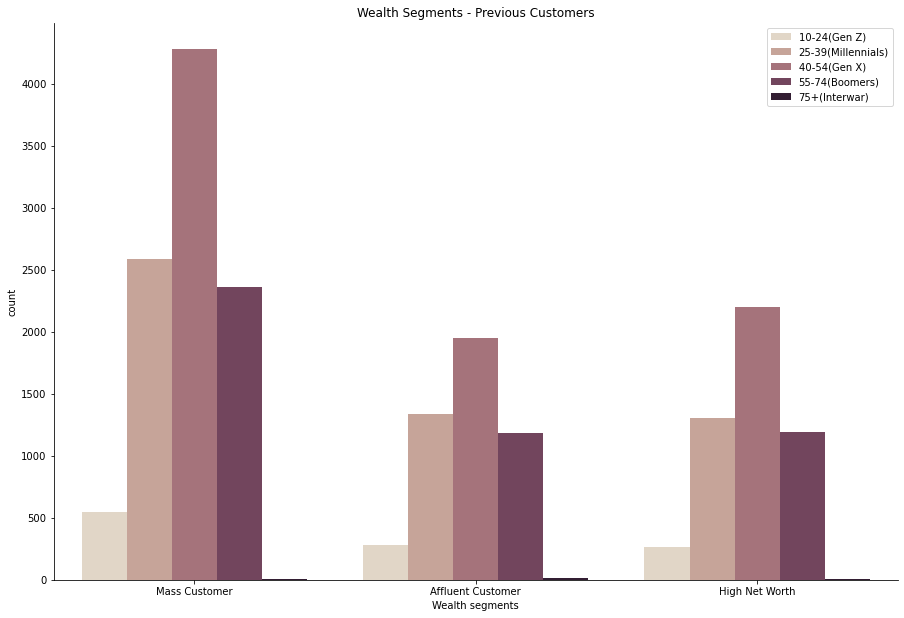

In [39]:
# Wealth segments: pre_customer 
wealth_plot_p = sns.catplot(x="wealth_segment", kind="count", hue='Generation',palette="ch:.25", data=pre_customer,height=8.27, aspect=12.5/8.27)
wealth_plot_p.set(title="Wealth Segments - Previous Customers")
plt.xlabel('Wealth segments')
wealth_plot_p._legend.remove()
plt.legend(labels=['10-24(Gen Z)', '25-39(Millennials)', '40-54(Gen X)','55-74(Boomers)','75+(Interwar)'],loc='upper right')
plt.savefig('wealth_plot_p.png')

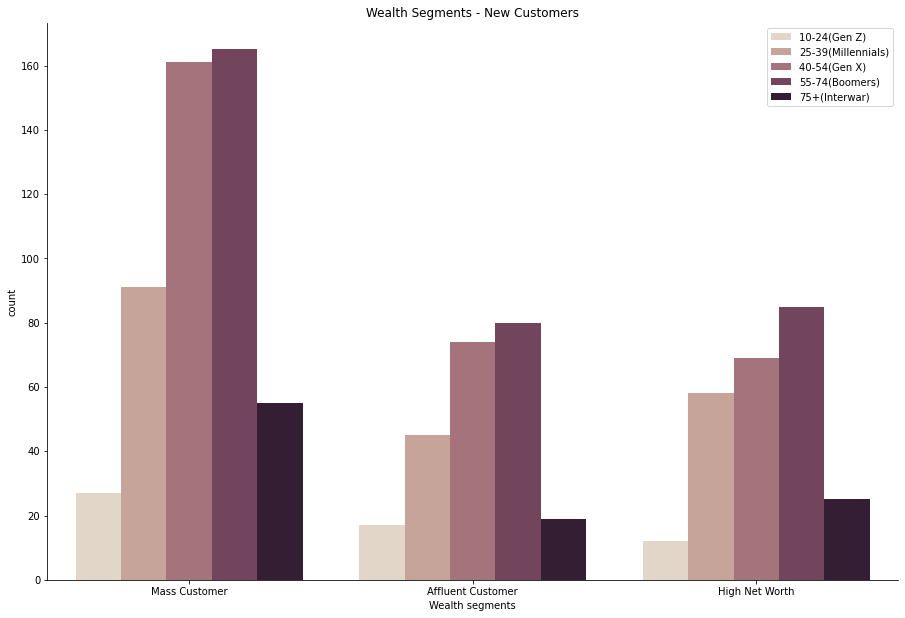

In [40]:
# Wealth segments: new_customer 
wealth_plot_n = sns.catplot(x="wealth_segment", kind="count", hue='Generation',palette="ch:.25", data=new_customer,height=8.27, aspect=12.5/8.27)
wealth_plot_n.set(title="Wealth Segments - New Customers")
plt.xlabel('Wealth segments')
wealth_plot_n._legend.remove()
plt.legend(labels=['10-24(Gen Z)', '25-39(Millennials)', '40-54(Gen X)','55-74(Boomers)','75+(Interwar)'],loc='upper right')
plt.savefig('wealth_plot_n.png')

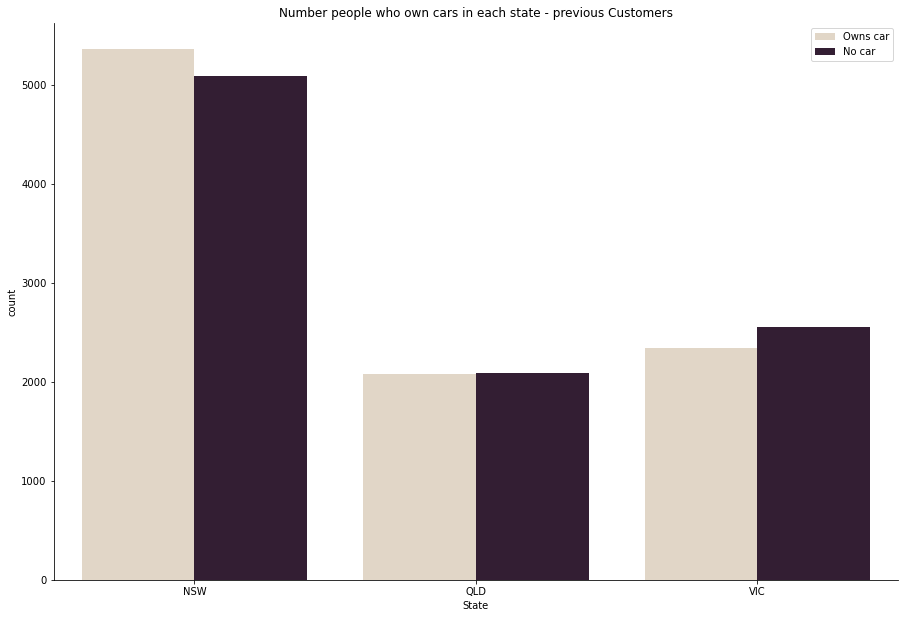

In [42]:
# number of cars owned in each state: pre customers 
car_plot_p = sns.catplot(x="state", kind="count", hue='owns_car',palette="ch:.25", data=pre_customer,height=8.27, aspect=12.5/8.27)
car_plot_p.set(title="Number people who own cars in each state - previous Customers")
plt.xlabel('State')
car_plot_p._legend.remove()
plt.legend(labels=['Owns car', 'No car'],loc='upper right')
plt.savefig('car_plot_p.png')

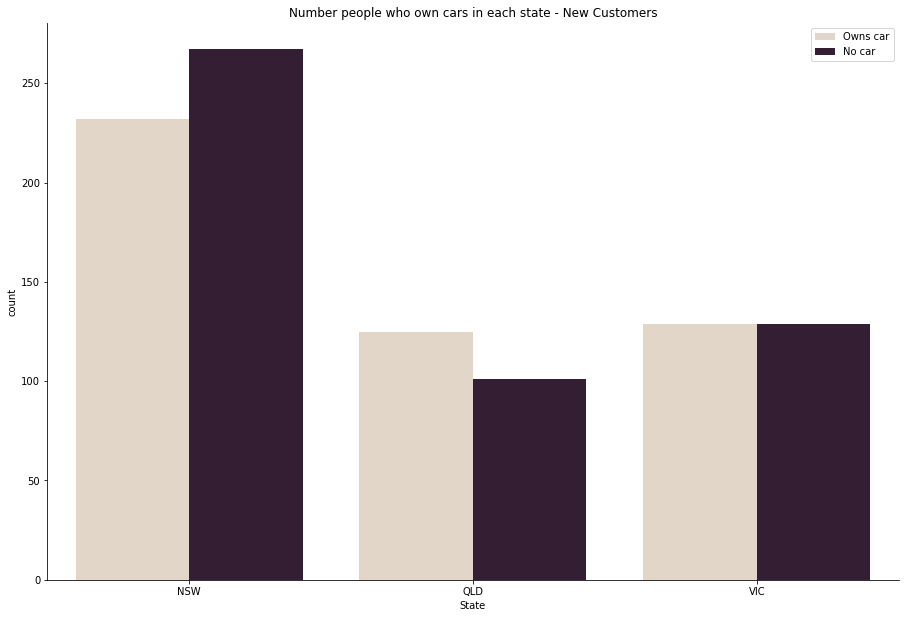

In [43]:
# number of cars owned in each state: new customers 
car_plot_n = sns.catplot(x="state", kind="count", hue='owns_car',palette="ch:.25", data=new_customer,
                         order=['NSW','QLD','VIC'],height=8.27, aspect=12.5/8.27)
car_plot_n.set(title="Number people who own cars in each state - New Customers")
plt.xlabel('State')
car_plot_n._legend.remove()
plt.legend(labels=['Owns car', 'No car'],loc='upper right')
plt.savefig('car_plot_n.png')

## High value customer summary

#### Two target groups
##### 1. Similar to previous customer group
- Age: 40-54(Gen X)
- Female
- Working in Manufacturing, Financial Services or Health
- Wealth segment in Mass Customer	
- Living in New South Wales(NSW)

##### 2. Explore new customers in emerging customer groups
- Age: 55+, including 55-74(Boomers) & 75+(Interwar)
- Female
- Working in Manufacturing, Financial Services or Health
- Wealth segment in Mass Customer	
- Living in New South Wales(NSW)

In [63]:
# List of high value customers similar to previous customers
industry = ['Manufacturing','Financial Services','Health']
high_value_customer = new_customer.loc[(new_customer['Age'] >= 40) 
                                       & (new_customer['Age'] < 55) 
                                       & (new_customer['gender'] =='Female') 
                                       & (new_customer['job_industry_category'].isin(industry))
                                       &  (new_customer['wealth_segment'] =='Mass Customer') 
                                       & (new_customer['state']=='NSW')]                                 
                                          

high_value_customer


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Generation
13,Melba,Spellacy,Female,38,1976-12-09,VP Marketing,Health,Mass Customer,N,No,4,0591 Anzinger Circle,2232,NSW,Australia,10,14,1.593750,46,3
55,Martelle,Tuppeny,Female,52,1981-02-03,Marketing Assistant,Manufacturing,Mass Customer,N,No,9,261 Grayhawk Way,2226,NSW,Australia,10,54,1.381250,41,3
78,Chanda,Mensler,Female,15,1972-01-14,Computer Systems Analyst IV,Manufacturing,Mass Customer,N,Yes,13,0 Mockingbird Plaza,2212,NSW,Australia,10,78,1.337500,50,3
82,Esther,Rooson,Female,14,1981-02-22,NaN,Financial Services,Mass Customer,N,No,5,5186 Main Trail,2046,NSW,Australia,9,78,1.337500,41,3
91,Patricia,Everix,Female,34,1978-02-19,Director of Sales,Health,Mass Customer,N,No,19,91164 Washington Terrace,2263,NSW,Australia,7,89,1.312500,44,3
138,Daryl,Pauncefort,Female,12,1979-06-18,Community Outreach Specialist,Financial Services,Mass Customer,N,Yes,12,0 Dexter Parkway,2380,NSW,Australia,3,133,1.237500,43,3
250,Sunny,Christescu,Female,90,1975-03-12,Cost Accountant,Financial Services,Mass Customer,N,No,11,6668 Blue Bill Park Plaza,2209,NSW,Australia,10,250,1.075000,47,3
272,Theresa,Cowper,Female,99,1976-08-24,Accountant III,Manufacturing,Mass Customer,N,No,3,88 Mifflin Pass,2529,NSW,Australia,10,271,1.060000,46,3
308,Loleta,Aberdalgy,Female,45,1981-02-15,Occupational Therapist,Health,Mass Customer,N,No,11,99 Westend Court,2287,NSW,Australia,6,304,1.025000,41,3
366,Daisi,Tinwell,Female,84,1971-12-24,Business Systems Development Analyst,Financial Services,Mass Customer,N,No,11,19561 Express Street,2777,NSW,Australia,8,366,0.975000,51,3


In [ ]:
# Export high value customer list csv
high_value_customer.to_csv( "high_value_customer_1.csv", index=False, encoding='utf-8-sig')

In [44]:
# List of high value customers in emerging market
industry = ['Manufacturing','Financial Services','Health']
high_value_customer = new_customer.loc[(new_customer['Age'] >= 55)                                       
                                       & (new_customer['gender'] =='Female') 
                                       & (new_customer['job_industry_category'].isin(industry))
                                       &  (new_customer['wealth_segment'] =='Mass Customer') 
                                       & (new_customer['state']=='NSW')]                                 
                                          

high_value_customer

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Generation
81,Valerie,Pickover,Female,34,1965-09-08,Editor,Financial Services,Mass Customer,N,No,9,92214 Spenser Road,2756,NSW,Australia,8,78,1.337500,57,4
145,Nadiya,Balasini,Female,40,1950-11-05,Sales Associate,Financial Services,Mass Customer,N,No,15,92934 Mallory Trail,2164,NSW,Australia,9,146,1.225000,72,4
146,Tyne,Coate,Female,82,1965-07-15,Developer II,Manufacturing,Mass Customer,N,No,17,90820 Thackeray Street,2218,NSW,Australia,8,146,1.225000,57,4
157,Roseanne,Caruth,Female,16,1957-05-25,Programmer Analyst III,Health,Mass Customer,N,No,7,33652 Lyons Alley,2763,NSW,Australia,9,158,1.187500,65,4
201,Engracia,Dobbs,Female,84,1959-04-19,NaN,Health,Mass Customer,N,No,15,72 Eliot Place,2250,NSW,Australia,8,202,1.140625,63,4
228,Maribeth,Stivani,Female,46,1954-11-13,Associate Professor,Financial Services,Mass Customer,N,No,7,945 Bobwhite Court,2430,NSW,Australia,8,226,1.112500,68,4
334,Vitia,Axtens,Female,62,1945-08-08,Financial Advisor,Financial Services,Mass Customer,N,Yes,15,42681 Carey Alley,2011,NSW,Australia,10,334,0.998750,77,5
348,Caron,Kezar,Female,11,1953-08-08,Social Worker,Health,Mass Customer,N,No,5,40553 Rigney Avenue,2835,NSW,Australia,1,349,0.987500,69,4
351,Murial,Bulloch,Female,59,1964-10-01,NaN,Financial Services,Mass Customer,N,No,13,391 Old Shore Lane,2011,NSW,Australia,6,349,0.987500,58,4
380,Gabrila,Toopin,Female,7,1963-01-14,Junior Executive,Manufacturing,Mass Customer,N,No,12,1914 Oakridge Place,2456,NSW,Australia,6,378,0.956250,59,4


In [45]:
# Export high value customer list csv
high_value_customer.to_csv( "high_value_customer_2.csv", index=False, encoding='utf-8-sig')